# Oliver Wyman HackatOW #
### In the first task of the project we will start by cleaning and manipulating the datasets we were provided, identifying and solving data inconsistencies as well as delivering relevant statistics on specific features. ###



### Importing libraries and packages ###

In [1]:
import pandas as pd
import numpy as np 
import plotly
import math

### Data Loading ###

**CPI**

In [2]:
CPIs = pd.read_excel('Consumer Price Index_vShared.xlsx')
display(CPIs)
CPIs.info()

,Date_monthly,CPI_monthly,Date_daily,CPI_daily
0,2019-01-01,120.5,2019-01-01,120.500000
1,2019-02-01,120.8,2019-01-02,120.509677
2,2019-03-01,121.1,2019-01-03,120.519355
3,2019-04-01,121.1,2019-01-04,120.529032
4,2019-05-01,121.4,2019-01-05,120.538710
...,...,...,...,...
1456,NaT,NaN,2022-12-27,129.619355
1457,NaT,NaN,2022-12-28,129.635484
1458,NaT,NaN,2022-12-29,129.651613
1459,NaT,NaN,2022-12-30,129.667742


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date_monthly  48 non-null     datetime64[ns]
 1   CPI_monthly   48 non-null     float64       
 2   Date_daily    1461 non-null   datetime64[ns]
 3   CPI_daily     1461 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 45.8 KB


**Product Dataset**

In [3]:
products = pd.read_csv('Hackathon_DimProduct_SAN_vShared.csv')

display(products)
products.info()

,ProductKey,BrandKey,SupplierKey,ProductCategory_Lvl1,ProductCategory_Lvl2
0,key_52138,3521,1039040101,Category A,category aa
1,19864,3521,1039040125,Category A,Category AC
2,95144,1713,1049688101,Category A,Category AA
3,23070,3521,1050235101,Category A,Category AC
4,93165,3521,1039040125,Category A,Category AC
...,...,...,...,...,...
293,12353,3521,1036290101,Category A,Category AB
294,55442,132,1036290101,Category A,Category AC
295,78206,3521,1039040101,Category A,Category AC
296,55438,132,1036290101,Category A,Category AB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ProductKey            298 non-null    object
 1   BrandKey              298 non-null    int64 
 2   SupplierKey           298 non-null    int64 
 3   ProductCategory_Lvl1  298 non-null    object
 4   ProductCategory_Lvl2  298 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


Let us check if any mistake was done in recording products by value counting the categorical columns.

In [4]:
products["ProductCategory_Lvl1"].value_counts()

Category A    298
Name: ProductCategory_Lvl1, dtype: int64

In [5]:
products["ProductCategory_Lvl2"].value_counts()

Category AA     107
Category AB      88
Category AC      65
Category AE      23
Category AD       8
category aa       2
category ab       2
Category  AC      1
Categrory AE      1
Category  AD      1
Name: ProductCategory_Lvl2, dtype: int64

In [6]:
products["ProductCategory_Lvl2"].values.dtype

dtype('O')

As it is immediately noticed from the first entry, some product keys are wrongly typed. key_ should not be present in the entries but it appears 4 times. Furthermore, a minor mistake was done in the categories, since some letters were not capitalized properly. We will use simple string manipulation to get the job done.

In [7]:
Productkeycorr = []
ProductCategory_Lvl2corr = []

for p in products["ProductKey"]:
    if "key_" in p:
        p = p[4:]
        Productkeycorr.append(p)
    else:
        Productkeycorr.append(p) 

for c in products["ProductCategory_Lvl2"]:
    
    if c[0] == "c":
        l = c.capitalize()
        l = l[:-2] + l[-2:].upper()
        ProductCategory_Lvl2corr.append(l)
    elif c == "Category  AC" or c == "Category  AE" or c == "Category  AD":
        l = ""
        l = c[0:8] + c[-3:]
        ProductCategory_Lvl2corr.append(l)

    elif c == "Categrory AE":
        l = ""
        l = c[0:5] + c[6:]
        ProductCategory_Lvl2corr.append(l)
    else:
        ProductCategory_Lvl2corr.append(c) 

            
products["ProductCategory_Lvl2"] = np.array(ProductCategory_Lvl2corr)
products["ProductKey"] = np.array(Productkeycorr)


display(products)
        

,ProductKey,BrandKey,SupplierKey,ProductCategory_Lvl1,ProductCategory_Lvl2
0,52138,3521,1039040101,Category A,Category AA
1,19864,3521,1039040125,Category A,Category AC
2,95144,1713,1049688101,Category A,Category AA
3,23070,3521,1050235101,Category A,Category AC
4,93165,3521,1039040125,Category A,Category AC
...,...,...,...,...,...
293,12353,3521,1036290101,Category A,Category AB
294,55442,132,1036290101,Category A,Category AC
295,78206,3521,1039040101,Category A,Category AC
296,55438,132,1036290101,Category A,Category AB


As we can see below, the categories are finally correct.

In [8]:
products['ProductCategory_Lvl2'].value_counts()

Category AA    109
Category AB     90
Category AC     66
Category AE     24
Category AD      9
Name: ProductCategory_Lvl2, dtype: int64

**Promotion Dataset**

Now we will do the same with the promotion dataset, which contains relevant information on the promotions of the asian retailer.

In [9]:
promotions = pd.read_csv('Hackathon_DimPromotion_SAN_vShared.csv')

display(promotions)
promotions.info()

,PromotionKey,PromoMechanic,PromotionStartDate,PromotionEndDate
0,312237,Percentage off,10/1/2021,10/6/2021
1,265157,Buy $X for Y%,2/25/2020,2/25/2020
2,270553,Buy $X for $Y,1/15/2020,1/27/2020
3,308082,X units for $Y (X = 1),3/10/2021,3/29/2021
4,317323,PWP,5/13/2022,7/6/2022
...,...,...,...,...
3426,297974,X units for $Y (X = 1),1/1/2022,6/30/2022
3427,339287,Buy $X for $Y,12/12/2021,12/12/2021
3428,263837,X units for $Y (X = 1),2/27/2020,3/30/2020
3429,375529,X units for $Y (X > 1),11/16/2022,1/2/2023


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PromotionKey        3431 non-null   int64 
 1   PromoMechanic       3431 non-null   object
 2   PromotionStartDate  3431 non-null   object
 3   PromotionEndDate    3431 non-null   object
dtypes: int64(1), object(3)
memory usage: 107.3+ KB


As Promomechanic categories will serve for out aggregate analysis, we regroup and see how these are distributed.

In [10]:
promotions["PromoMechanic"].value_counts()

Buy $X for $Y             723
X units for $Y (X = 1)    710
X units for $Y (X > 1)    657
Percentage off            338
PWP                       242
Buy $X for Y%             175
Buy X free Y              113
GWP                       106
Xth for Y%                100
X units for Y%             94
Buy X free X               78
Coupon/Voucher             33
Member Points              24
Unknown                    16
Price off                  14
Xth @ $Y                    8
Name: PromoMechanic, dtype: int64

**Store Dataset**

The store dataset contains all the stores where the retailer sells its products. The location and the type of store are listed.

In [11]:
stores = pd.read_csv('Hackathon_DimStore_SAN_vShared.csv')

display(stores)
stores.info()

,StoreKey,DistributionChannel,StoreType,Region_Lvl1,Region_Lvl2
0,559,Physical,Store Type B,RegionA,Region 34
1,168,Physical,Store Type B,RegionA,Region 2
2,2061,Physical,Store Type E,RegionA,Region 10
3,590,Physical,Store Type D,RegionA,Region 2
4,301,Physical,Store Type B,RegionA,Region 123
...,...,...,...,...,...
734,463,Physical,Store Type B,RegionB,Region 141
735,4,Physical,Store Type C,RegionA,Region 4
736,280,Physical,Store Type D,RegionB,Region 39
737,688,Physical,Store Type G,RegionA,Region 112


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   StoreKey             739 non-null    int64 
 1   DistributionChannel  739 non-null    object
 2   StoreType            739 non-null    object
 3   Region_Lvl1          739 non-null    object
 4   Region_Lvl2          739 non-null    object
dtypes: int64(1), object(4)
memory usage: 29.0+ KB


Let us see if some strange category comes up in the stores DataFrame.

In [12]:
stores["StoreType"].value_counts()

Store Type B    336
Store Type C    146
Store Type E    106
Store Type D     67
Store Type A     27
Other            24
Store Type G     15
Store Type F     12
Store Type H      3
Store Type K      1
Store Type J      1
Store Type I      1
Name: StoreType, dtype: int64

In [13]:
stores["Region_Lvl1"].value_counts()

RegionA    623
RegionB    106
Online      10
Name: Region_Lvl1, dtype: int64

In [14]:
stores["Region_Lvl2"].value_counts()

Region 2      58
Region 7      35
Region 30     27
Region 11     24
Region 12     24
              ..
Region 132     1
Region 197     1
Region 100     1
Region 135     1
Region 112     1
Name: Region_Lvl2, Length: 222, dtype: int64

As we see, there are 2 geographical information on the stores, the first indicates the "larger" region where the store is located, whilst the second shows its subregion.

**Transaction Dataset**

The transaction dataset is arguably one of the most important datasets we need. It contains all the transactions, entailing the prices (both the full and the discounted ones) as well as the products sold in the peach (unitvolume).

In [15]:
transactions = pd.read_csv('Hackathon_FactSalesTransactionDATES_vShared.csv')

display(transactions)
transactions.info()

,TransactionDate,DayOfWeek,WeekendFlag,StoreKey,ProductKey,UnitVolume,ActualSales,SalesDiscount,RetailFullPrice
0,2020-01-29,Wednesday,False,118,49334,2.0,103.35080,-16.87360,120.2244
1,2021-10-31,Sunday,True,78,59511,1.0,17.13725,-17.13725,34.2745
2,2021-06-17,Thursday,False,672,97438,1.0,22.46298,-14.97532,37.4383
3,2022-02-06,Sunday,True,193,58921,2.0,42.18400,-9.49140,51.6754
4,2022-03-29,Tuesday,False,2059,44633,1.0,31.63800,-12.65520,44.2932
...,...,...,...,...,...,...,...,...,...
11300998,2022-02-07,Monday,False,56,62330,31.0,634.02552,-330.40618,964.4317
11300999,2020-01-15,Wednesday,False,4,39983,1.0,18.45550,0.00000,18.4555
11301000,2022-09-22,Thursday,False,654,95835,3.0,87.00450,0.00000,87.0045
11301001,2020-03-06,Friday,False,369,49489,1.0,29.00150,0.00000,29.0015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11301003 entries, 0 to 11301002
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TransactionDate  object 
 1   DayOfWeek        object 
 2   WeekendFlag      object 
 3   StoreKey         object 
 4   ProductKey       object 
 5   UnitVolume       float64
 6   ActualSales      float64
 7   SalesDiscount    float64
 8   RetailFullPrice  float64
dtypes: float64(4), object(5)
memory usage: 776.0+ MB


Let us also check if days are all correct and also turn transactiondate series to datetime object.

In [16]:
#checking whether days are 7.
transactions["DayOfWeek"].value_counts()

Saturday     1857497
Sunday       1848111
Friday       1624278
Thursday     1510615
Monday       1503625
Wednesday    1474490
Tuesday      1458409
Name: DayOfWeek, dtype: int64

In [17]:
#turning dates
wu = pd.to_datetime(transactions["TransactionDate"])
transactions["TransactionDate"] = wu 


**Transaction Promotion Dataset**

In [18]:
transactions_promo = pd.read_csv('Hackathon_FactSalesTransactionPromotion_vShared.csv')

display(transactions_promo)
transactions_promo.info()

,TransactionDate,StoreKey,ProductKey,PromotionKey
0,2021-06-13,615,49492,348444
1,2020-01-15,118,26841,324048
2,2021-01-06,653,97953,273352
3,2022-04-24,288,95792,356728
4,2022-08-28,382,62330,364487
...,...,...,...,...
5318756,2020-04-09,358,41631,267707
5318757,2022-03-13,576,95836,270013
5318758,2021-05-08,358,59736,256313
5318759,2021-10-31,193,95822,326071


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318761 entries, 0 to 5318760
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TransactionDate  object
 1   StoreKey         object
 2   ProductKey       int64 
 3   PromotionKey     int64 
dtypes: int64(2), object(2)
memory usage: 162.3+ MB


We notice that the transactiondate column has a generic object datatype and hence, we trn it into a datetime object to better work with pandas groupby and aggregation functions.

In [19]:
w2 = pd.to_datetime(transactions_promo["TransactionDate"])
transactions_promo["TransactionDate"] = w2 


**Holidays Dataset**

Finally, the holiday dataset contains the holiday days during the year.

In [20]:
holidays = pd.read_csv('Hackathon_HolidaysMY_vShared.csv')

display(holidays)
holidays.info()

,Holiday Description,Comments
0,New Year's Eve,NaN
1,Chinese New Year's Day,Note: If Lunar New Year's Day falls on a Sunda...
2,Federal Territory Day,NaN
3,Hari Raya Puasa (End of Ramadan),Ramadan shifts
4,Labor Day,NaN
5,Wesak Day (Buddha's Birthday),NaN
6,King's Birthday,NaN
7,Hari Raya Qurban (Feast of Sacrifice),NaN
8,Awal Muharram (Islamic New Year),NaN
9,Merdeka Day (National Day),NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Holiday Description  13 non-null     object
 1   Comments             2 non-null      object
dtypes: object(2)
memory usage: 336.0+ bytes


### Time to join datasets ##

The idea is to join Transaction with Product on ProductKey and then joining the result with Store on StoreKey. The code below will create the first merged dataframe, then we will merge Transaction Promotion with Promotion on PromotionKey. We proceed in this way because in the Transaction dataset there is no column representing the PromotionKey. Hence, we will first create two different merged dataframe before finally joining them.

In [21]:
transactions_p = pd.merge(transactions, products, on='ProductKey')
display(transactions_p)

,TransactionDate,DayOfWeek,WeekendFlag,StoreKey,ProductKey,UnitVolume,ActualSales,SalesDiscount,RetailFullPrice,BrandKey,SupplierKey,ProductCategory_Lvl1,ProductCategory_Lvl2
0,2020-01-29,Wednesday,False,118,49334,2.0,103.3508,-16.8736,120.2244,3521,1028407101,Category A,Category AC
1,2021-05-31,Monday,False,60,49334,3.0,172.4271,0.0000,172.4271,3521,1028407101,Category A,Category AC
2,2022-11-02,Wednesday,False,2045,49334,5.0,287.3785,-26.3650,313.7435,3521,1028407101,Category A,Category AC
3,2022-02-16,Wednesday,False,2005,49334,2.0,114.9514,0.0000,114.9514,3521,1028407101,Category A,Category AC
4,2021-11-29,Monday,False,227,49334,5.0,261.0135,-52.7300,313.7435,3521,1028407101,Category A,Category AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11242036,2022-05-08,Sunday,True,301,49494,1.0,0.0000,0.0000,0.0000,3521,1036290101,Category A,Category AB
11242037,2020-04-29,Wednesday,False,506,49494,1.0,0.0000,0.0000,0.0000,3521,1036290101,Category A,Category AB
11242038,2021-03-30,Tuesday,False,315,22131,0.0,0.0000,0.0000,0.0000,3521,1039040101,Category A,Category AA
11242039,2021-11-14,Sunday,True,273,48671,0.0,0.0000,0.0000,0.0000,1713,1049688101,Category A,Category AA


In [22]:
transactions_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11242041 entries, 0 to 11242040
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   TransactionDate       datetime64[ns]
 1   DayOfWeek             object        
 2   WeekendFlag           object        
 3   StoreKey              object        
 4   ProductKey            object        
 5   UnitVolume            float64       
 6   ActualSales           float64       
 7   SalesDiscount         float64       
 8   RetailFullPrice       float64       
 9   BrandKey              int64         
 10  SupplierKey           int64         
 11  ProductCategory_Lvl1  object        
 12  ProductCategory_Lvl2  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.2+ GB


While trying to merge transactions_p with Store we found that StoreKey in transactions_p is of type object, hence we tried to simply merge changing the type to int but the issue was that there were some rows saved as **indexNumber_Key** hence we had first to clean them in order to merge the two dataframes.

In [23]:
storeKeys = np.array(transactions_p['StoreKey'])
storeKeys_clean = []

for i in storeKeys:
    try:
        storeKeys_clean.append(int(i))
    except:
        storeKeys_clean.append(int(i[0:-4]))
        
storeKeys_clean = np.array(storeKeys_clean)

transactions_p['StoreKey'] = storeKeys_clean
display(transactions_p)

,TransactionDate,DayOfWeek,WeekendFlag,StoreKey,ProductKey,UnitVolume,ActualSales,SalesDiscount,RetailFullPrice,BrandKey,SupplierKey,ProductCategory_Lvl1,ProductCategory_Lvl2
0,2020-01-29,Wednesday,False,118,49334,2.0,103.3508,-16.8736,120.2244,3521,1028407101,Category A,Category AC
1,2021-05-31,Monday,False,60,49334,3.0,172.4271,0.0000,172.4271,3521,1028407101,Category A,Category AC
2,2022-11-02,Wednesday,False,2045,49334,5.0,287.3785,-26.3650,313.7435,3521,1028407101,Category A,Category AC
3,2022-02-16,Wednesday,False,2005,49334,2.0,114.9514,0.0000,114.9514,3521,1028407101,Category A,Category AC
4,2021-11-29,Monday,False,227,49334,5.0,261.0135,-52.7300,313.7435,3521,1028407101,Category A,Category AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11242036,2022-05-08,Sunday,True,301,49494,1.0,0.0000,0.0000,0.0000,3521,1036290101,Category A,Category AB
11242037,2020-04-29,Wednesday,False,506,49494,1.0,0.0000,0.0000,0.0000,3521,1036290101,Category A,Category AB
11242038,2021-03-30,Tuesday,False,315,22131,0.0,0.0000,0.0000,0.0000,3521,1039040101,Category A,Category AA
11242039,2021-11-14,Sunday,True,273,48671,0.0,0.0000,0.0000,0.0000,1713,1049688101,Category A,Category AA


We are now ready to merge the 2 datasets.

In [24]:
transactions_ps = pd.merge(transactions_p, stores, on='StoreKey')
display(transactions_ps)

,TransactionDate,DayOfWeek,WeekendFlag,StoreKey,ProductKey,UnitVolume,ActualSales,SalesDiscount,RetailFullPrice,BrandKey,SupplierKey,ProductCategory_Lvl1,ProductCategory_Lvl2,DistributionChannel,StoreType,Region_Lvl1,Region_Lvl2
0,2020-01-29,Wednesday,False,118,49334,2.0,103.3508,-16.8736,120.2244,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
1,2022-02-26,Saturday,True,118,49334,7.0,402.3299,0.0000,402.3299,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
2,2020-09-24,Thursday,False,118,49334,3.0,166.0995,-14.2371,180.3366,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
3,2021-01-19,Tuesday,False,118,49334,4.0,229.9028,-21.0920,250.9948,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
4,2020-02-26,Wednesday,False,118,49334,2.0,114.9514,-5.2730,120.2244,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11437243,2022-12-09,Friday,False,748,93291,36.0,569.4840,-854.2260,1423.7100,3521,1039040101,Category A,Category AB,Physical,Other,RegionA,Region 30
11437244,2022-12-02,Friday,False,748,93291,72.0,1138.9680,-1708.4520,2847.4200,3521,1039040101,Category A,Category AB,Physical,Other,RegionA,Region 30
11437245,2022-12-02,Friday,False,748,93291,72.0,1138.9680,-1708.4520,2847.4200,3521,1039040101,Category A,Category AB,Physical,Other,RegionA,Region 30
11437246,2022-12-10,Saturday,True,748,93291,37.0,585.3030,-877.9545,1463.2575,3521,1039040101,Category A,Category AB,Physical,Other,RegionA,Region 30


We finally obtained a dataframe via joining the Transaction, Product and Store datasets. Now, it is time to create the second dataframe, obtained via joining Transaction Promotion, Promotion, Product and Store.

In [25]:
#changing productkeys on transactions_promo to string in order to merge with productions dataframe
transactions_promo["ProductKey"] = np.array([str(x) for x in transactions_promo["ProductKey"]])
transactions_promo_p = pd.merge(transactions_promo, products, on='ProductKey')
display(transactions_promo_p)

,TransactionDate,StoreKey,ProductKey,PromotionKey,BrandKey,SupplierKey,ProductCategory_Lvl1,ProductCategory_Lvl2
0,2021-06-13,615,49492,348444,3521,1036290101,Category A,Category AB
1,2021-09-28,646,49492,295634,3521,1036290101,Category A,Category AB
2,2021-06-12,422,49492,348444,3521,1036290101,Category A,Category AB
3,2020-11-30,112,49492,293481,3521,1036290101,Category A,Category AB
4,2021-02-07,156,49492,289114,3521,1036290101,Category A,Category AB
...,...,...,...,...,...,...,...,...
5318756,2022-04-18,896,35032,317735,3521,1098896101,Category A,Category AB
5318757,2022-05-11,896,35032,287270,3521,1098896101,Category A,Category AB
5318758,2020-05-18,896,12234,272994,3521,1028407101,Category A,Category AC
5318759,2020-02-05,896,12234,267370,3521,1028407101,Category A,Category AC


The last thing we need to merge in order to gather some statistical insights, is to finally merge promotions in the df.
What we noticed though, is that the Promotionkey column name was added with a blank space. We will rename it.

In [26]:
transactions_promo_p.columns 
promotions.columns

Index(['PromotionKey ', 'PromoMechanic', 'PromotionStartDate',
       'PromotionEndDate'],
      dtype='object')

In [27]:
promotions.rename(columns={'PromotionKey ': 'PromotionKey'}, inplace=True)

In [28]:
#merging transaction promo on promotion keyy
transactions_promo["TransactionDate"].value_counts()
promofin = pd.merge(transactions_promo_p, promotions, on='PromotionKey')
display(promofin)

,TransactionDate,StoreKey,ProductKey,PromotionKey,BrandKey,SupplierKey,ProductCategory_Lvl1,ProductCategory_Lvl2,PromoMechanic,PromotionStartDate,PromotionEndDate
0,2021-06-13,615,49492,348444,3521,1036290101,Category A,Category AB,PWP,5/5/2021,6/30/2021
1,2021-06-12,422,49492,348444,3521,1036290101,Category A,Category AB,PWP,5/5/2021,6/30/2021
2,2021-06-16,184,49492,348444,3521,1036290101,Category A,Category AB,PWP,5/5/2021,6/30/2021
3,2021-06-21,655,49492,348444,3521,1036290101,Category A,Category AB,PWP,5/5/2021,6/30/2021
4,2021-06-04,491,49492,348444,3521,1036290101,Category A,Category AB,PWP,5/5/2021,6/30/2021
...,...,...,...,...,...,...,...,...,...,...,...
5318756,2021-12-31,896,35032,249247,3521,1098896101,Category A,Category AB,X units for $Y (X = 1),10/15/2021,12/31/2021
5318757,2021-12-27,896,35032,249247,3521,1098896101,Category A,Category AB,X units for $Y (X = 1),10/15/2021,12/31/2021
5318758,2021-03-08,896,12320,256408,3521,1028407101,Category A,Category AC,Buy $X for $Y,3/8/2021,3/8/2021
5318759,2022-05-25,896,35033,253180,3521,1098896101,Category A,Category AB,Buy $X for $Y,5/25/2022,5/27/2022


In [29]:
promofin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318761 entries, 0 to 5318760
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   TransactionDate       datetime64[ns]
 1   StoreKey              object        
 2   ProductKey            object        
 3   PromotionKey          int64         
 4   BrandKey              int64         
 5   SupplierKey           int64         
 6   ProductCategory_Lvl1  object        
 7   ProductCategory_Lvl2  object        
 8   PromoMechanic         object        
 9   PromotionStartDate    object        
 10  PromotionEndDate      object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 486.9+ MB


In [30]:
transactions_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11437248 entries, 0 to 11437247
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   TransactionDate       datetime64[ns]
 1   DayOfWeek             object        
 2   WeekendFlag           object        
 3   StoreKey              int32         
 4   ProductKey            object        
 5   UnitVolume            float64       
 6   ActualSales           float64       
 7   SalesDiscount         float64       
 8   RetailFullPrice       float64       
 9   BrandKey              int64         
 10  SupplierKey           int64         
 11  ProductCategory_Lvl1  object        
 12  ProductCategory_Lvl2  object        
 13  DistributionChannel   object        
 14  StoreType             object        
 15  Region_Lvl1           object        
 16  Region_Lvl2           object        
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(9)
memory usage: 1.5+

 By looking into the dataset, we notice that some storekeys are not well recorded, as some were added with "key" at the beginning. We will remove it.

In [31]:
w4 = []
for el in promofin["StoreKey"]:
    if "key" in el:
        w4.append(int(el[4:]))
    
    else:
        w4.append(int(el))


promofin["StoreKey"] = w4 


In [32]:
total_products= pd.merge(transactions_ps, promofin, on=['TransactionDate', 'StoreKey', 'ProductKey', 'BrandKey', 'SupplierKey', 'ProductCategory_Lvl1', 'ProductCategory_Lvl2'], how='left')


# Fill in missing values with data from the promofin dataframe
total_products['PromotionKey'].fillna('No Promo', inplace = True)
total_products['PromoMechanic'].fillna('No Promo', inplace=True)
total_products['PromotionStartDate'].fillna('No Promo', inplace = True)
total_products['PromotionEndDate'].fillna('No Promo', inplace = True)
display(total_products)

,TransactionDate,DayOfWeek,WeekendFlag,StoreKey,ProductKey,UnitVolume,ActualSales,SalesDiscount,RetailFullPrice,BrandKey,...,ProductCategory_Lvl1,ProductCategory_Lvl2,DistributionChannel,StoreType,Region_Lvl1,Region_Lvl2,PromotionKey,PromoMechanic,PromotionStartDate,PromotionEndDate
0,2020-01-29,Wednesday,False,118,49334,2.0,103.3508,-16.8736,120.2244,3521,...,Category A,Category AC,Physical,Store Type B,RegionB,Region 17,306999.0,X units for $Y (X = 1),12/19/2019,2/10/2020
1,2022-02-26,Saturday,True,118,49334,7.0,402.3299,0.0000,402.3299,3521,...,Category A,Category AC,Physical,Store Type B,RegionB,Region 17,No Promo,No Promo,No Promo,No Promo
2,2020-09-24,Thursday,False,118,49334,3.0,166.0995,-14.2371,180.3366,3521,...,Category A,Category AC,Physical,Store Type B,RegionB,Region 17,290577.0,X units for $Y (X = 1),8/24/2020,10/5/2020
3,2021-01-19,Tuesday,False,118,49334,4.0,229.9028,-21.0920,250.9948,3521,...,Category A,Category AC,Physical,Store Type B,RegionB,Region 17,272917.0,X units for $Y (X = 1),12/21/2020,1/25/2021
4,2020-02-26,Wednesday,False,118,49334,2.0,114.9514,-5.2730,120.2244,3521,...,Category A,Category AC,Physical,Store Type B,RegionB,Region 17,319702.0,X units for $Y (X = 1),1/18/2020,3/4/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11437243,2022-12-09,Friday,False,748,93291,36.0,569.4840,-854.2260,1423.7100,3521,...,Category A,Category AB,Physical,Other,RegionA,Region 30,377551.0,X units for $Y (X = 1),11/24/2022,12/11/2022
11437244,2022-12-02,Friday,False,748,93291,72.0,1138.9680,-1708.4520,2847.4200,3521,...,Category A,Category AB,Physical,Other,RegionA,Region 30,377551.0,X units for $Y (X = 1),11/24/2022,12/11/2022
11437245,2022-12-02,Friday,False,748,93291,72.0,1138.9680,-1708.4520,2847.4200,3521,...,Category A,Category AB,Physical,Other,RegionA,Region 30,377551.0,X units for $Y (X = 1),11/24/2022,12/11/2022
11437246,2022-12-10,Saturday,True,748,93291,37.0,585.3030,-877.9545,1463.2575,3521,...,Category A,Category AB,Physical,Other,RegionA,Region 30,377551.0,X units for $Y (X = 1),11/24/2022,12/11/2022


Finally, we merge them all so that we can easily extract the relevant information and check for some insightful statistics about sold promoted products.

In [33]:
txs_not_discounted = transactions_ps[transactions_ps["SalesDiscount"] == 0]
display(txs_not_discounted)
print(total_products['ProductCategory_Lvl1'].value_counts())

,TransactionDate,DayOfWeek,WeekendFlag,StoreKey,ProductKey,UnitVolume,ActualSales,SalesDiscount,RetailFullPrice,BrandKey,SupplierKey,ProductCategory_Lvl1,ProductCategory_Lvl2,DistributionChannel,StoreType,Region_Lvl1,Region_Lvl2
1,2022-02-26,Saturday,True,118,49334,7.0,402.3299,0.0,402.3299,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
6,2020-08-29,Saturday,True,118,49334,8.0,480.8976,0.0,480.8976,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
7,2021-05-10,Monday,False,118,49334,4.0,208.8108,0.0,208.8108,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
14,2021-11-04,Thursday,False,118,49334,5.0,313.7435,0.0,313.7435,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
16,2022-05-18,Wednesday,False,118,49334,3.0,172.4271,0.0,172.4271,3521,1028407101,Category A,Category AC,Physical,Store Type B,RegionB,Region 17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11437143,2022-11-25,Friday,False,726,87723,12.0,373.3284,0.0,373.3284,3521,1098896101,Category A,Category AB,Physical,Other,RegionA,Region 30
11437169,2022-12-01,Thursday,False,731,14412,5.0,155.5535,0.0,155.5535,3521,1098896101,Category A,Category AB,Physical,Other,RegionA,Region 30
11437170,2022-11-29,Tuesday,False,731,14412,2.0,62.2214,0.0,62.2214,3521,1098896101,Category A,Category AB,Physical,Other,RegionA,Region 30
11437183,2022-11-29,Tuesday,False,731,14397,3.0,93.3321,0.0,93.3321,3521,1098896101,Category A,Category AB,Physical,Other,RegionA,Region 30


Category A    11437248
Name: ProductCategory_Lvl1, dtype: int64


## Second task: Product category and performance

In this part of the project we dive into the products analysis. We will start with computing relevant statistics on certain products and afterwards, we will focus on identifying general and insightful trends that can be valuable for the business, providing a framework that can be used for future studies and further analysis.

Beforehand, we get the statistics asked in the first task below!

In [34]:
sum_of_sales  = np.sum(total_products['ActualSales'])
print(f'The total sum of sales is: {round(sum_of_sales , 4)}')

The total sum of sales is: 3213385049.5526


In [35]:
sum_of_volumes = np.sum(total_products['UnitVolume'])
# print(sum_of_volumes)
print(f'The total sum of volume is: {round(sum_of_volumes , 4)}')

The total sum of volume is: 28068262.0


In [36]:
sum_of_discounts = np.sum(total_products['SalesDiscount'])
# print(round(sum_of_discounts, 2))
print(f'The total sum of discounts is: {round(sum_of_discounts , 4)}')

The total sum of discounts is: -140909657.7063


Here we display the dataframe showing the discount applied for each PromoMechanic rule.

In [37]:
sum_of_discounts_promomechanic = total_products.groupby(by = ['PromoMechanic'], as_index  = False)['SalesDiscount'].sum()
display(sum_of_discounts_promomechanic)
# print(np.sum(sum_of_discounts_promomechanic['SalesDiscount']))

,PromoMechanic,SalesDiscount
0,Buy $X for $Y,-1.011187e+07
1,Buy $X for Y%,-2.063721e+05
2,Buy X free X,-8.757020e+06
3,No Promo,-8.062417e+01
4,PWP,-3.975749e+07
5,Percentage off,-6.302129e+06
6,Price off,-1.243922e+04
7,X units for $Y (X = 1),-4.618764e+07
8,X units for $Y (X > 1),-2.161643e+07
9,X units for Y%,-2.700594e+06


Here we display the dataframe showing the sales for each distribution channel.

In [38]:
# print(total_products['DistributionChannel'].value_counts())
online_vs_offline_sales = total_products.groupby(by = ['DistributionChannel'], as_index  = False)['ActualSales'].sum()
display(online_vs_offline_sales)

,DistributionChannel,ActualSales
0,Online,5.159732e+07
1,Physical,3.161788e+09


We do the same for volume.

In [39]:
# print(total_products['DistributionChannel'].value_counts())
online_vs_offline_volume= total_products.groupby(by = ['DistributionChannel'], as_index  = False)['UnitVolume'].sum()
display(online_vs_offline_volume)

,DistributionChannel,UnitVolume
0,Online,814221.0
1,Physical,27254041.0


Again for discounts.

In [40]:
# print(total_products['DistributionChannel'].value_counts())
online_vs_offline_discounts= total_products.groupby(by = ['DistributionChannel'], as_index  = False)['SalesDiscount'].sum()
display(online_vs_offline_discounts)

,DistributionChannel,SalesDiscount
0,Online,-5.288079e+06
1,Physical,-1.356216e+08


Let us see how the store 2071 has done.

In [41]:
storekey2071 = total_products[total_products['StoreKey'] == 2071]
# display(storekey2071)
storekey2071_sales = np.sum(storekey2071['ActualSales'])
print(f'Total sales for Store 2071: {round(storekey2071_sales, 4)}')
storekey2071_discounts = np.sum(storekey2071['SalesDiscount'])
print(f'Total discounts for Store 2071: {round(storekey2071_discounts,4)}')

storekey2071_volume = np.sum(storekey2071['UnitVolume'])
print(f'Total volume for Store 2071: {storekey2071_volume}')

Total sales for Store 2071: 3220095.0408
Total discounts for Store 2071: -98310.8666
Total volume for Store 2071: 19636.0


The product category AC seems to be popular.

In [42]:
productCategoryAC = total_products[total_products['ProductCategory_Lvl2'] == 'Category AC']   
# display(productCategoryAC)
productCategoryAC_sales = np.sum(productCategoryAC['ActualSales'])
print(f'Total sales for Product Category AC: {round(productCategoryAC_sales, 4)}')
productCategoryAC_discounts = np.sum(productCategoryAC['SalesDiscount'])
print(f'Total discounts for Product Category AC: {round(productCategoryAC_discounts,4)}')

productCategoryAC_volume = np.sum(productCategoryAC['UnitVolume'])
print(f'Total volume for Product Category AC: {productCategoryAC_volume}')

Total sales for Product Category AC: 1210178843.7786
Total discounts for Product Category AC: -37722595.6933
Total volume for Product Category AC: 10097935.0


And the product 49489 too!

In [43]:
productKey49489 = total_products[total_products['ProductKey'] == '49489']   
# display(storekey2071)
productKey49489_sales = np.sum(productKey49489['ActualSales'])
print(f'Total sales for Product 49489: {round(productKey49489_sales, 4)}')
productKey49489_discounts = np.sum(productKey49489['SalesDiscount'])
print(f'Total discounts for Product 49489: {round(productKey49489_discounts,4)}')

productKey49489_volume = np.sum(productKey49489['UnitVolume'])
print(f'Total volume for Product 49489: {productKey49489_volume}')

Total sales for Product 49489: 29908763.4048
Total discounts for Product 49489: -1017907.0913
Total volume for Product 49489: 228209.0


Now, we are ready to start with the second task. First, let us see some basic statistics on sales, unitvolumes sold and discounts made over the 10 year span. Actually, 2012 was the only significant year until 2020, where sales have literally boomed. Either the retailer has not operated in these 10 years, or we miss lots of data.

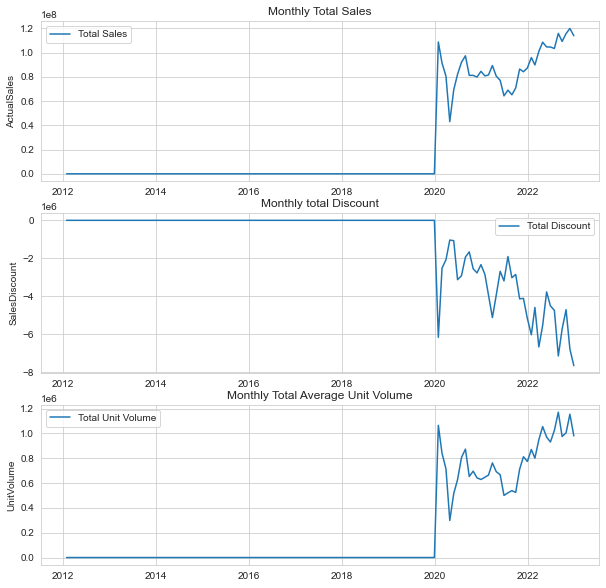

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Convert TransactionDate column to datetime format
total_products['TransactionDate'] = pd.to_datetime(total_products['TransactionDate'])

# Group by month and calculate average sales, discounts, and unit volumes
param = ['Actual sales','UnitVolume','SalesDiscount']
monthly_data = total_products.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M')).sum()

# Plot monthly trends
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

ax[0].plot(monthly_data['ActualSales'], label='Total Sales')
ax[0].set_title('Monthly Total Sales')
ax[0].set_ylabel('ActualSales')
ax[0].legend()

ax[1].plot(monthly_data['SalesDiscount'], label='Total Discount')
ax[1].set_title('Monthly total Discount')
ax[1].set_ylabel('SalesDiscount')
ax[1].legend()

ax[2].plot(monthly_data['UnitVolume'], label='Total Unit Volume')
ax[2].set_title('Monthly Total Average Unit Volume')
ax[2].set_ylabel('UnitVolume')
ax[2].legend()

plt.show()


In this section we will separetely show the actual average sales per month. There is a red line to separate data from 2012 from the remaining, we felt that without it would be misleading for the eventual reader.

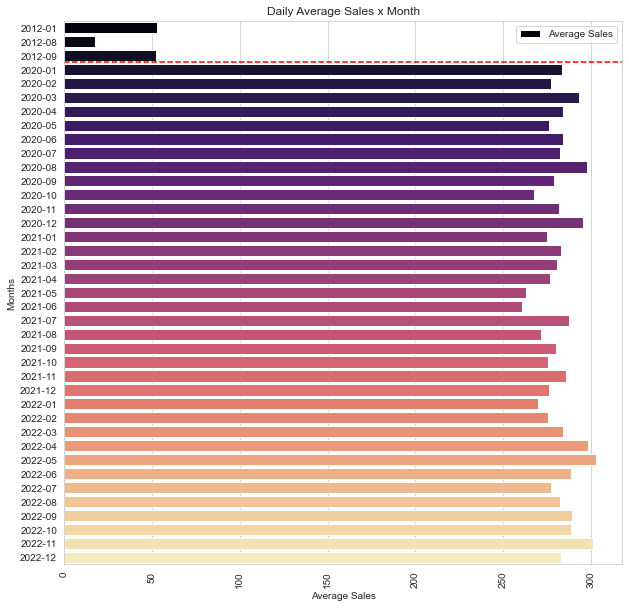

In [45]:
param = ['ActualSales','SalesDiscount','UnitVolume', 'DistributionChannel']
monthly_data_mean = total_products.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M'))[param].mean()
 

monthly_data_mean.dropna(inplace = True)   #getting rid of months where actual sales were null (no sales)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
months = [str(x)[0:7] for x in monthly_data_mean.index.to_list()]  #displaying only the months
monthly_data_mean.reset_index(inplace=True)
monthly_data_mean['TransactionDate'] = months 

sns.barplot(data= monthly_data_mean, y = monthly_data_mean['TransactionDate'], x = monthly_data_mean['ActualSales'], label='Average Sales', orient = 'h', palette= 'magma')
plt.axhline(y=2.5, color='r', linestyle='--')
plt.title('Daily Average Sales x Month')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Sales')
plt.legend() ;

The sales discounts are also displayed below.

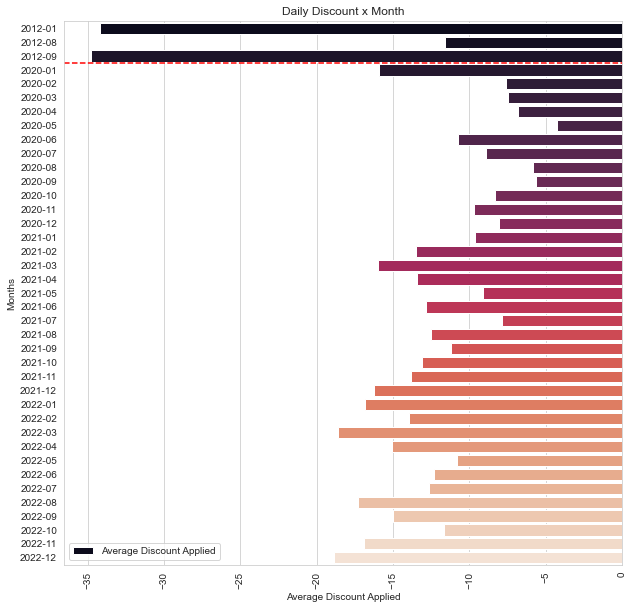

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data= monthly_data_mean, y = monthly_data_mean['TransactionDate'], x = monthly_data_mean['SalesDiscount'], label='Average Discount Applied', orient="h", palette = 'rocket')
plt.axhline(y=2.5, color='r', linestyle='--')
plt.title('Daily Discount x Month')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Discount Applied')
plt.legend() ;

And eventually, let us see how unit volumes have changed over time.

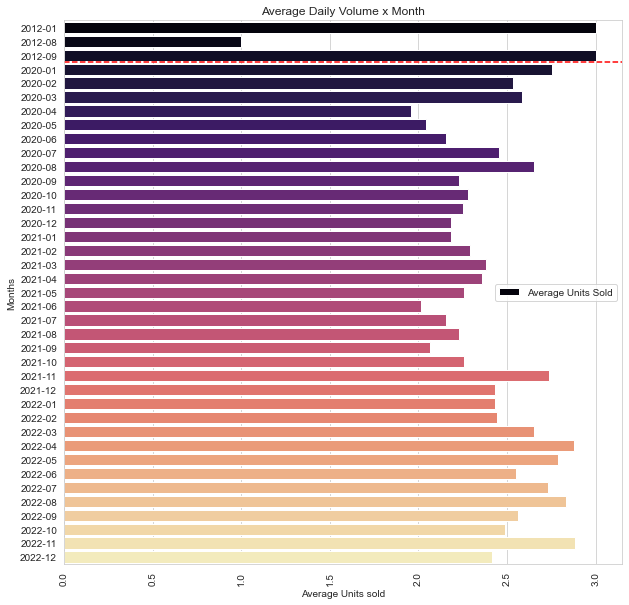

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data = monthly_data_mean, y = monthly_data_mean['TransactionDate'], x = monthly_data_mean['UnitVolume'], label='Average Units Sold', orient="h", palette = 'magma')
plt.axhline(y=2.5, color='r', linestyle='--')
plt.title('Average Daily Volume x Month')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Units sold')
plt.legend() ;

In [48]:
online_total_product = total_products[total_products['DistributionChannel'] == 'Online']
offline_total_product = total_products[total_products['DistributionChannel'] == 'Physical']

monthly_data_mean_online = online_total_product.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M'))[param].mean()
# display(monthly_data_mean_online)
monthly_data_mean_online.dropna(inplace = True)   #getting rid of months where actual sales were null (no sales)
months_1 = [str(x)[0:7] for x in monthly_data_mean_online.index.to_list()]  #displaying only the months
monthly_data_mean_online.reset_index(inplace=True)
monthly_data_mean_online['TransactionDate'] = months_1

monthly_data_mean_offline = offline_total_product.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M'))[param].mean()
# display(monthly_data_mean_online)
monthly_data_mean_offline.dropna(inplace = True)   #getting rid of months where actual sales were null (no sales)
months_2 = [str(x)[0:7] for x in monthly_data_mean_offline.index.to_list()]  #displaying only the months
monthly_data_mean_offline.reset_index(inplace=True)
monthly_data_mean_offline['TransactionDate'] = months_2 


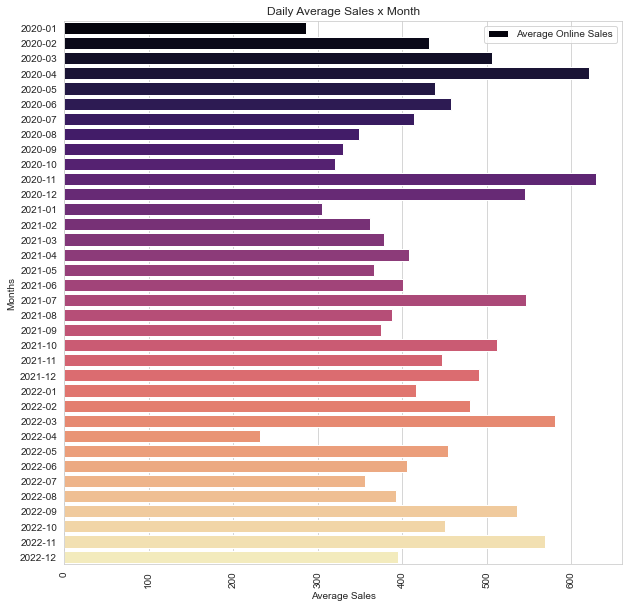

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data= monthly_data_mean_online, y = monthly_data_mean_online['TransactionDate'], x = monthly_data_mean_online['ActualSales'], label='Average Online Sales', orient = 'h', palette = 'magma')
plt.title('Daily Average Sales x Month')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Sales')
plt.legend();

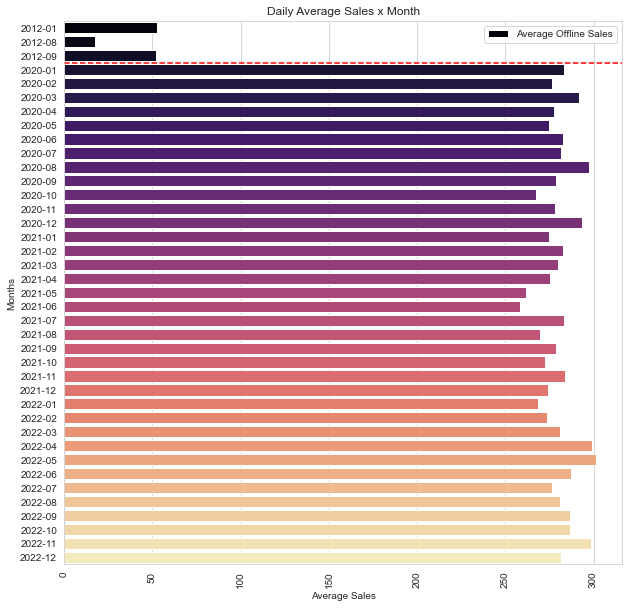

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data= monthly_data_mean, y = monthly_data_mean_offline['TransactionDate'], x = monthly_data_mean_offline['ActualSales'], label='Average Offline Sales', orient = 'h', palette = 'magma')
plt.axhline(y=2.51, color='r', linestyle='--')
plt.title('Daily Average Sales x Month')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Sales')
plt.legend() ;

We try now to create a dynamic chart to allow the user to analyze a deeper spectrum of dimensions in the data.

In [51]:
total_products['TransactionDate'] = pd.to_datetime(total_products['TransactionDate'])

total_products['Date_monthly'] = total_products['TransactionDate'].dt.to_period('M')

total_products['SalesType'] = total_products['DistributionChannel'].apply(lambda x: 'Online' if x == 'Online' else 'Offline')

total_products['DiscountType'] = total_products['SalesDiscount'].apply(lambda x: 'Discounted' if x > 0 else 'Non-Discounted')

total_products['Region'] = total_products['Region_Lvl2']

total_products['SubCategory'] = total_products['ProductCategory_Lvl2']

total_products = total_products.merge(CPIs, on='Date_monthly', how='left')


We try now to create a dynamic chart to allow the user to analyze a deeper spectrum of dimensions in the data.

In [52]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

region_sales = total_products.groupby('Region_Lvl1')['ActualSales'].sum()

fig = make_subplots(rows=1, cols=1)

trace = go.Bar(
    x=region_sales.index,
    y=region_sales.values,
    name='Actual Sales',
    marker=dict(color='blue')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title='Total Sales by Region',
    xaxis_title='Region',
    yaxis_title='Actual Sales'
)

fig.show()


After visualizing the 3 top regions, we take a look at the region A subregions sales.

In [53]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

regionA_sales = total_products[total_products['Region_Lvl1'] == 'RegionA']

region_sales = regionA_sales.groupby('Region_Lvl2')['ActualSales'].sum()

fig = make_subplots(rows=1, cols=1)

trace = go.Bar(
    x=region_sales.index,
    y=region_sales.values,
    name='Actual Sales',
    marker=dict(color='red')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title='Total Sales by Region',
    xaxis_title='Region A: subregions',
    yaxis_title='Actual Sales'
)

fig.show()


Now it is turn for Region B.

In [54]:
regionB_sales = total_products[total_products['Region_Lvl1'] == 'RegionB']
# print(regionA_sales)
region_sales = regionB_sales.groupby('Region_Lvl2')['ActualSales'].sum()

fig = make_subplots(rows=1, cols=1)

trace = go.Bar(
    x=region_sales.index,
    y=region_sales.values,
    name='Actual Sales',
    marker=dict(color='green')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title='Total Sales by Subregion',
    xaxis_title='Region B: subregions',
    yaxis_title='Actual Sales'
)

fig.show()

Commenta cosa hai fatto brodi

In [55]:
temp = total_products['ProductCategory_Lvl2']
temp = np.array(temp)
temp = [i if i[0:9] == 'Category' else 'Category' + i[9::] for i in temp]
total_products['ProductCategory_Lvl2'] = temp

category_sales = total_products.groupby('ProductCategory_Lvl2')['ActualSales'].sum()
# print(category_sales)

We also show a barplot where total sales per category are shown.

In [56]:
fig = make_subplots(rows=1, cols=1)


trace = go.Bar(
    x=category_sales.index,
    y=category_sales.values,
    name='Actual Sales',
    marker=dict(color='orange')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title='Total Sales by Category',
    xaxis_title='Category',
    yaxis_title='Actual Sales'
)

fig.show()

Even though total sales can be a good way to estimate the popularity of product categories, the average seems more appropriate as it takes into account the number ofproducts belonging to each category.

In [57]:
category_mean = total_products.groupby('ProductCategory_Lvl2')['ActualSales'].mean()
# print(category_sales)

In [58]:
fig = make_subplots(rows=1, cols=1)


trace = go.Bar(
    x=category_mean.index,
    y=category_mean.values,
    name='Actual Sales',
    marker=dict(color='cyan')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title='Total Sales by Category',
    xaxis_title='Category',
    yaxis_title='Actual Sales'
)

fig.show()

In [60]:
total_products.columns

Index(['TransactionDate', 'DayOfWeek', 'WeekendFlag', 'StoreKey', 'ProductKey',
       'UnitVolume', 'ActualSales', 'SalesDiscount', 'RetailFullPrice',
       'BrandKey', 'SupplierKey', 'ProductCategory_Lvl1',
       'ProductCategory_Lvl2', 'DistributionChannel', 'StoreType',
       'Region_Lvl1', 'Region_Lvl2', 'PromotionKey', 'PromoMechanic',
       'PromotionStartDate', 'PromotionEndDate', 'Date_monthly', 'SalesType',
       'DiscountType', 'Region', 'SubCategory', 'CPI_monthly ', 'Date_daily',
       'CPI_daily'],
      dtype='object')

Below, we will create a simple function called SalesAnalyzer, which will show some sales insights (Total sales, unitvolumes and discounts), according to what measure we want to obtain (E.g max sales, min sales, average, total). This can be an easy and useful class that can be afterwards used by analysts to extract useful information about the sales.

In [59]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SalesAnalyzer:
    
    def __init__(self, data, inp1, inp2, param1):   #setting up the relevant parameters
        self.data = data
        self.inp1 = inp1 
        self.inp2 = inp2
        self.param1 = param1  
        #self.columns = data.columns 

    def boxplot(self):             #producing a boxplot for the column chosen
        p7 = str(self.inp2)
        sns.boxplot(self.data[p7])

    def correlation_stat(self):   #this help you understand if there exists some correlation between features in the sales data!    
        self.data['Discount']
        print(self.data.columns)
        print(self.data.columns.dtypes)
        feat = []
        while True:
            featinp = str(input("Select the feature name you want (must be numerical!), if you are done, please type 'stop': "))
            if featinp != "stop" and featinp in self.data.columns:
                feat.append(featinp)
            if featinp == "stop":
                break 

            else:
                print('wrong choice, try again')
                
            
        new_corr = self.data[feat]
        sns.heatmap(new_corr.corr(), annot = True)


    def summary_statistics(self, param1):
    
        summary = self.data[param1].describe()
        return summary
    


    def sales_by_category2(self):
        
        inpsal = str(self.inp2)
        if self.inp1 == "sum":
            fig, ax = plt.subplots(figsize=(10,6))
            category_sales = self.data.groupby('SubCategory')[inpsal].sum().sort_values(ascending=False)
            category_sales.plot(kind='bar', ax=ax)
            ax.set_title('Total Sales by Product Category')
            ax.set_xlabel('Product Category')
            ax.set_ylabel('Actual Sales')
            plt.show()
        if inpsal == "avg":
            fig, ax = plt.subplots(figsize=(10,6))
            category_sales = self.data.groupby('SubCategory')[inpsal].mean().sort_values(ascending=False)
            category_sales.plot(kind='bar', ax=ax)
            ax.set_title('Total Sales by Product Category')
            ax.set_xlabel('Product Category')
            ax.set_ylabel('Actual Sales')
            plt.show()
        else:
            exit 
            


        
    def sales_by_region(self):
        p3 = str(self.inp2)
        fig, ax = plt.subplots(figsize=(10,6))
        if self.inp1 == "sum":

            region_sales = self.data.groupby('Region_Lvl1')[p3].sum().sort_values(ascending=False)
            region_sales.plot(kind='bar', ax=ax)
            ax.set_title('Total Sales by Region')
            ax.set_xlabel('Region')
            ax.set_ylabel('Actual Sales')
            plt.show()
        
        if self.inp1 == "avg":
            region_sales = self.data.groupby('Region_Lvl1')[p3].mean().sort_values(ascending=False)
            region_sales.plot(kind='bar', ax=ax)
            ax.set_title('Total Sales by Region')
            ax.set_xlabel('Region')
            ax.set_ylabel('Actual Sales')
            plt.show()

        
    def sales_by_store_type(self):
        p4 = str(self.inp2)
        fig, ax = plt.subplots(figsize=(10,6))
        if self.inp1 == "sum":
            store_type_sales = self.data.groupby('StoreType')[p4].sum().sort_values(ascending=False)
            store_type_sales.plot(kind='bar', ax=ax)
            ax.set_title('Total Sales by Store Type')
            ax.set_xlabel('Store Type')
            ax.set_ylabel('Actual Sales')
            plt.show()
        if self.inp1 == "avg":
            store_type_sales = self.data.groupby('StoreType')[p4].mean().sort_values(ascending=False)
            store_type_sales.plot(kind='bar', ax=ax)
            ax.set_title('Total Sales by Store Type')
            ax.set_xlabel('Store Type')
            ax.set_ylabel('Actual Sales')
            plt.show()

    

        
    def discount_distribution(self):
        fig, ax = plt.subplots(figsize=(10,6))
        discount_distribution = self.data['SalesDiscount']
        discount_distribution.hist(bins=20, ax=ax)
        ax.set_title('Distribution of Sales Discounts')
        ax.set_xlabel('Sales Discount')
        ax.set_ylabel('Frequency')
        plt.show()
        
    def unit_volume_vs_actual_sales(self):                              #let us see how revenues change with respect to unit volumes sold
        fig, ax = plt.subplots(figsize=(10,6))
        ax.scatter(self.data['UnitVolume'], self.data['ActualSales'])
        ax.set_title('Unit Volume vs Actual Sales')
        ax.set_xlabel('Unit Volume')
        ax.set_ylabel('Actual Sales')
        plt.show()

    
    

def param1():
        inp1 = str(input("Do you want to see the average of your parameter or its sum? Pick between 'sum' and 'avg': "))
        if inp1 in ["sum", "avg"]:
            return inp1


def param2():
    print(param)        
    inp2 = str(input("Do you want to see actual sales, unitvolumes or discount info? Pick the parameter among the ones printed : "))
    if inp2 in param[0:-1]:
        return inp2
    else:
        print("There is no such pick available!")
        exit() 
        
             
s1 = SalesAnalyzer(total_products, inp1 = param1(), inp2 = param2(), param1 = param[0:-1])
#s1.summary_statistics()
#s1.sales_by_category()
#s1.sales_by_category2()
#s1.correlation_stat()
s1.unit_volume_vs_actual_sales()



        






        

KeyboardInterrupt: Interrupted by user

As we have created a general class to look into the general data, we want to offer a general framework for products too. It is indeed important to extract relevant and specific trends in products by comparing their performance in a comprehensive way. 

In [ ]:
#In this class one can choose to retain insights on a specific product.

class Product_Analysis():
    def __init__(self, data, products):
        self.data = data
        self.products = products
        self.params = ['RetailFullPrice', 'UnitVolume', 'ActualSales', 'SalesDiscount']


    def describe_product(self):
        des_inp = int(input("Please select the product key: "))
        if des_inp in self.products:
            des_p = self.data[self.data['ProductKey' == des_inp]]
            # create a bar plot of the descriptive statistics of the actual sales column
            print(self.params)
            inpf = str(input("Pick the NUMERICAL feature that you want to investigate into (these are printed below): "))
            des_p[inpf].describe().plot(kind='bar')
            plt.title('Some Statistics for Product ' + str(des_inp))
            plt.xlabel('Statistic')
            plt.ylabel('Features')
            plt.show()
            

#The function below will show how the chosen statistics change over time for a specific product

    def product_lineplot(self):
        inpy = int(input("Please insert the Product key you want to look into: "))
        if inpy in self.products:
            print(self.params)
            inpf = str(input("Pick the NUMERICAL feature that you want to investigate into (these are printed below): "))
            if inpf in self.params:
                prod = self.data[self.data['ProductKey' == inpy]]
                prod = prod.sort_values('TransactionDate')
                sns.lineplot(x = prod['TransactionDate'], y = prod[inpf]) 
            else:
                print("There is no product having this key!!")
                quit()


    def discount_distribution_product(self):
        inpy = int(input("Please insert the Product key you want to look into: "))

        fig, ax = plt.subplots(figsize=(10,6))
        discount_distribution = self.data['ProductKey' == inpy]['SalesDiscount']
        discount_distribution.hist(bins=20, ax=ax)
        ax.set_title(f'Distribution of Sales Discounts for product number {inpy} ')
        ax.set_xlabel('Sales Discount')
        ax.set_ylabel('Frequency')
        plt.show()
            




    
pr = Product_Analysis(total_products, Productkeycorr)
pr.describe_product()
pr.product_lineplot()


Let us also see how each different subcategory has performed by looking at some statistics.

In [ ]:
region_sales_by_cat = pd.DataFrame()
region_sales_by_cat['mean'] = total_products.groupby('ProductCategory_Lvl2')['ActualSales'].mean()
region_sales_by_cat['max'] = total_products.groupby('ProductCategory_Lvl2')['ActualSales'].max()
region_sales_by_cat['min'] = total_products.groupby('ProductCategory_Lvl2')['ActualSales'].min()




In [ ]:
region_sales_by_cat.head()
#region_sales_by_cat.index

,mean,max,min
ProductCategory_Lvl2,,,
Category AA,271.457421,99999.0,-113.8968
Category AB,272.959054,99999.0,-209.8654
Category AC,297.350445,99999.0,-313.7435
Category AD,240.287252,99999.0,-211.9746
Category AE,296.513384,99999.0,-682.8535


In [ ]:


trace1 = go.Bar(
    x=region_sales_by_cat.index,
    y=region_sales_by_cat['mean'],
    name='Average sales',
    #marker=dict(color='green')



)

trace2 = go.Bar(
    x=region_sales_by_cat.index,
    y=region_sales_by_cat['max'],
    name='Sales by category',
    marker=dict(color='blue'))

trace3 = go.Bar(
    x=region_sales_by_cat.index,
    y=region_sales_by_cat['min'],
    name='Minimum sales',
    #marker=dict(color='red')
)




# Combine the traces into a data list
data = [trace1, trace2, trace3]

# Set the layout
layout = go.Layout(
    barmode='group',
    title='Sales Comparison by Product Category',
    xaxis=dict(title='Product Category'),
    yaxis=dict(title='Sales')
)

fig2 = go.Figure(data=data, layout=layout)
fig2.show() 



After getting some useful insights on products, we will deeply analyze some of them. Those have respectively, 49340, 49341, 49333 and 49329 as productkeys. We will take into account parameters we have not used so far, such as seasonality (seasons as well as the respective holidays) and consumer price index (macroeconomic conditions for regions and locations) among others.

In [ ]:
# integrating consumer price index

cpi_monthly = CPIs
cpi_monthly['Date_monthly'] = pd.to_datetime(cpi_monthly['Date_monthly'], format='%Y-%m')
cpi_monthly = np.array(cpi_monthly['Date_monthly'])
cpi_monthly = [str(i)[0:7] for i in cpi_monthly if str(i) != 'NaT']
# print(cpi_monthly)
cpi_2_merge = CPIs[['CPI_monthly ']].dropna()
cpi_2_merge['Date_monthly'] = cpi_monthly
# print(cpi_2_merge)

monthly_data_mean = total_products.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M'))[param].mean()
monthly_data_mean = monthly_data_mean.reset_index().dropna()
# print(monthly_data_mean)
monthly_dates = np.array(monthly_data_mean['TransactionDate'])
monthly_data_mean = monthly_data_mean.drop(monthly_data_mean.columns[0], axis = 1)
# display(monthly_data_mean)
monthly_sales = [str(i)[0:7] for i in monthly_dates]
monthly_data_mean['Date_monthly'] = monthly_sales
# # print(sales_2_merge)

cpi_monthly_sales = pd.merge(cpi_2_merge, monthly_data_mean, on = 'Date_monthly')
# display(cpi_monthly_sales)

In [ ]:
# Defining a function to map the month to the season
def get_season(month : int):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [ ]:
# Creating a dictionary to map holidays to their corresponding dates
holidays = {
    1 : "Chinese New Year's Day",
    2 : "Federal Territory Day",
    3 : 'No Holidays',
    4 : "Hari Raya Puasa (End of Ramadan)",
    5 : ["Labor Day", "Wesak Day"],
    6 : 'No Holidays',
    7 : "Hari Raya Qurban (Feast of Sacrifice)",
    8 : "National Day",
    9 : "Malaysia Day",
    10 : "Deepavali",
    11 : 'No Holidays',
    12 : ["Christmas Day","New Year's Eve"]
}

In [ ]:
# Add the 'season' column to the DataFrame
cpi_monthly_sales['season'] = cpi_monthly_sales['Date_monthly'].apply(lambda x: get_season(int(x[5:7])))

# Add the holiday column to the DataFrame
holiday_mapper = lambda x: holidays[int(x[5:7])] if isinstance(holidays[int(x[5:7])], str) else ', '.join(holidays[int(x[5:7])])

cpi_monthly_sales['holiday'] = cpi_monthly_sales['Date_monthly'].map(holiday_mapper)


# display(cpi_monthly_sales)

As we have integrated other interesting features, we are now ready to discover some implications of them. First, we will see how CPI has evolved over time, giving emphasis to each separate season.

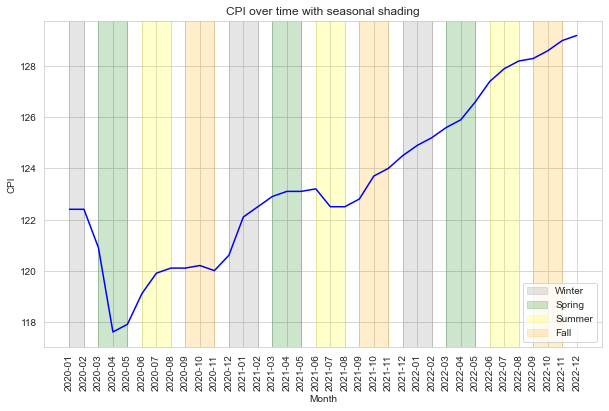

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(cpi_monthly_sales['Date_monthly'], cpi_monthly_sales['CPI_monthly '], color='blue')

# Shade the winter season
ax.axvspan('2020-01', '2020-02', alpha=0.2, color='gray', label='Winter')
ax.axvspan('2020-12', '2021-02', alpha=0.2, color='gray')
ax.axvspan('2021-12', '2022-02', alpha=0.2, color='gray')

# Shade the spring season
ax.axvspan('2020-03', '2020-05', alpha=0.2, color='green', label='Spring')
ax.axvspan('2021-03', '2021-05', alpha=0.2, color='green')
ax.axvspan('2022-03', '2022-05', alpha=0.2, color='green')

# Shade the summer season
ax.axvspan('2020-06', '2020-08', alpha=0.2, color='yellow', label='Summer')
ax.axvspan('2021-06', '2021-08', alpha=0.2, color='yellow')
ax.axvspan('2022-06', '2022-08', alpha=0.2, color='yellow')

# Shade the fall season
ax.axvspan('2020-09', '2020-11', alpha=0.2, color='orange', label='Fall')
ax.axvspan('2021-09', '2021-11', alpha=0.2, color='orange')
ax.axvspan('2022-09', '2022-11', alpha=0.2, color='orange')

# Add labels and legend
ax.set_xlabel('Month')
plt.xticks(rotation=90)
ax.set_ylabel('CPI')
ax.set_title('CPI over time with seasonal shading')
ax.legend()
plt.show()
# This code creates a line chart of CPI over time, and adds shaded regions for each season. The result should look like this:

# line_chart_shaded_regions

# Heatmap calendar
# A heatmap calendar is a great way to visualize trends over time on a daily basis. Here's an example of how to create this chart



A good way to see the effects of CPI on sales is to create a boxplot that will summarize it.

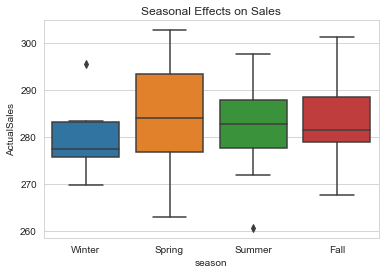

In [ ]:
sns.boxplot(x='season', y='ActualSales', data=cpi_monthly_sales)
plt.title('Seasonal Effects on Sales')
plt.show()

C:\Users\39339\AppData\Local\Temp\ipykernel_15868\1099709037.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\39339\AppData\Local\Temp\ipykernel_15868\1099709037.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



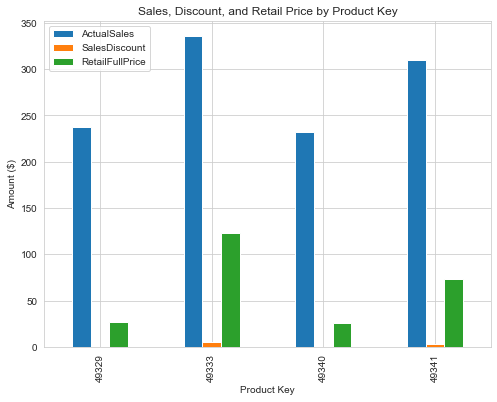

In [ ]:
product_keys = [49340, 49341, 49333, 49329]
data_products = total_products[total_products['ProductKey'].isin(product_keys)]

absolute_discounts = data_products['SalesDiscount'].abs().copy()
data_products.loc[:, 'SalesDiscount'] = absolute_discounts

# Group the data by product key and aggregate the sales, discount, and retail price columns
data_products['SalesDiscount'] = abs(data_products['SalesDiscount'])

df_grouped = data_products.groupby(['ProductKey']).agg({'ActualSales': 'mean', 'SalesDiscount': 'mean', 'RetailFullPrice': 'mean'})

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

df_grouped.plot(kind='bar', ax=ax)

ax.set_xlabel('Product Key')
ax.set_ylabel('Amount ($)')
ax.set_title('Sales, Discount, and Retail Price by Product Key')

plt.show()

....

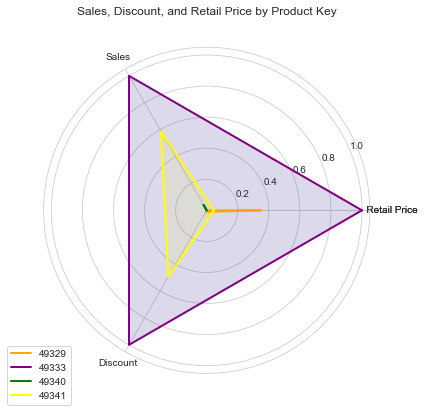

In [ ]:
df_grouped = data_products.groupby(['ProductKey']).agg({'ActualSales': 'sum', 'SalesDiscount': 'mean', 'RetailFullPrice': 'mean'})
df_norm = (df_grouped - df_grouped.min()) / (df_grouped.max() - df_grouped.min())
# print(df_norm)


categories = ['Sales', 'Discount', '      Retail Price']
N = len(categories)
categories.insert(0, '')


angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

# Define the colors to use
colors = ['orange', 'purple', 'green', 'yellow', '']

# Loop over each row of the normalized dataframe and plot a polygon
for i in range(len(df_norm)):
    values = df_norm.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=df_norm.index[i], color=colors[i % len(colors)])
    ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])
    
ax.fill(angles, [1]*(N + 1), alpha=0.1)
ax.set_thetagrids(angles * 180/np.pi, categories)
ax.set_title('Sales, Discount, and Retail Price by Product Key', y=1.08)
ax.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.show()


....

In [ ]:
# drop unnecessary columns
total_products_4inf = total_products[['TransactionDate', 'DayOfWeek', 'WeekendFlag', 'SalesDiscount', 'DistributionChannel']]

# one-hot encode categorical variables
df_encoded = pd.get_dummies(total_products_4inf, columns=['DayOfWeek', 'WeekendFlag', 'DistributionChannel'])

# rename columns to remove spaces and slashes
df_encoded.columns = df_encoded.columns.str.replace(' ', '').str.replace('/', '')

df_encoded = df_encoded.sort_values(by='TransactionDate')
df_encoded = df_encoded.drop(df_encoded.columns[0], axis = 1)
# display(df_encoded)

In [ ]:
import tigramite
from tigramite.independence_tests import ParCorr
from tigramite.pcmci import PCMCI

# create PCMCI object
pcmci = PCMCI(df_encoded, cond_ind_test=ParCorr())

# run PCMCI algorithm to obtain causal graph
results = pcmci.run_pcmci(tau_max=1, pc_alpha=0.01)

# plot the causal graph
tigramite.plotting.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=results['val_matrix'] != 0,
    var_names=df_encoded.columns,
    link_colorbar_label='cross-MCI (absolute)',
    node_colorbar_label='autoreg. MCI (absolute)',
    figsize=(10, 8),

SyntaxError: incomplete input (2523214008.py, line 18)